## kaggle 데이터 연습

In [16]:
import pandas as pd 

train = pd.read_csv("keggle/playground-series-s4e7/train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [8]:
train.shape

(11504798, 12)

## 문제 1. 
- 나이 그룹 분류 : 'Age_Group'이라는 새로운 열이 추가하도록 한다. Age를 'Young', 'Middle-Aged', 'Senior'으로 분류합니다.
- 분류 기준
  + 30세 이하는 Young
  + 50세 이하는 Middle-Aged
  + 그 외는 Senior로 분류

In [8]:
# code

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,Young


## 문제 2. 
- 성별에 따른 연간 보험료 평균을 구하세요
    + 컬럼 : Annual_Premium, Gender

In [17]:
train.groupby('Gender', observed= True)['Annual_Premium'].mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000209D7A0E310>>

## 문제 3. 
- Gender는 남성이면서, 이전에 보험에 가입하지 않았으며, 차량 연식 < 1년 이하인 값을 구하세요.
- 컬럼 정보 : Gender, Previously_Insured, Vehicle_Age

In [29]:
train.loc[(train['Gender'] == 'Male') & (train['Previously_Insured'] == 0) & (train['Vehicle_Age'] < '< 1 Year'), :].reset_index(drop = True)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,12,Male,36,1,28.0,0,1-2 Year,Yes,38104.0,26.0,203,0
2,16,Male,34,1,37.0,0,1-2 Year,Yes,30226.0,26.0,240,0
3,28,Male,40,1,35.0,0,1-2 Year,Yes,2630.0,157.0,204,1
4,29,Male,40,1,28.0,0,1-2 Year,Yes,54522.0,124.0,181,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2520919,11504772,Male,55,1,28.0,0,1-2 Year,Yes,48353.0,26.0,111,0
2520920,11504773,Male,43,1,15.0,0,1-2 Year,Yes,2630.0,26.0,287,0
2520921,11504777,Male,42,1,3.0,0,1-2 Year,Yes,47788.0,26.0,283,0
2520922,11504786,Male,56,1,46.0,0,1-2 Year,No,25705.0,124.0,76,0


## 문제 4. 
- Policy_Sales_Channel이 7.0 또는 152.0인 데이터를 필터링 하세요

In [28]:
train.loc[(train['Policy_Sales_Channel'] == 7.0) | (train['Policy_Sales_Channel'] == 152.0), :].reset_index(drop = True)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
1,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
2,5,Female,31,1,47.0,1,< 1 Year,No,28150.0,152.0,197,0
3,6,Male,23,1,45.0,1,< 1 Year,No,27128.0,152.0,190,0
4,8,Female,26,1,28.0,1,< 1 Year,No,31639.0,152.0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4210505,11504790,Female,21,1,36.0,1,< 1 Year,No,38097.0,152.0,275,0
4210506,11504791,Female,31,1,32.0,1,< 1 Year,No,2630.0,152.0,204,0
4210507,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
4210508,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0


### 층화추출

In [7]:
stratified_sample = train.groupby('Response').apply(
    lambda x: x.sample(frac=0.001)
)

stratified_sample.to_csv("kaggle_test.csv", index=False)

C:\Users\pcuser\AppData\Local\Temp\ipykernel_20356\1063128695.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = train.groupby('Response').apply(


## Matplotlib & seaborn

### 문제 1

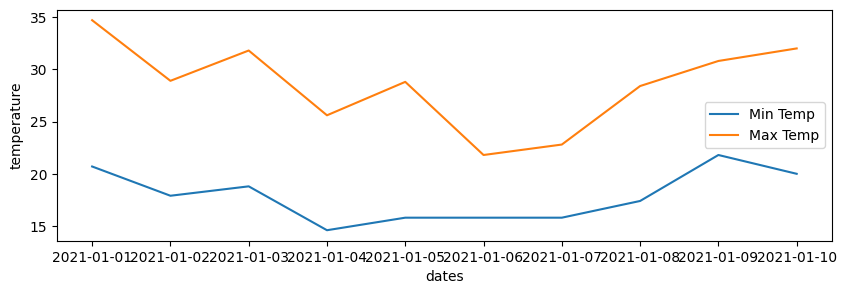

In [36]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

#객체지향 형태로 문법 시작
fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(dates, min_temperature, label = 'Min Temp')
ax.plot(dates, max_temperature, label = 'Max Temp')
ax.legend(loc=5)
ax.set_xlabel('dates')
ax.set_ylabel('temperature')
plt.show()

### 문제 2 (matplotlib)

In [39]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import yfinance as yf
import matplotlib.pyplot as plt

# TSLA 데이터 다운로드
data = yf.download('TSLA', start='2020-01-01', end='2024-07-02')


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2024-06-25,184.399994,187.970001,182.009995,187.350006,187.350006,63678300
2024-06-26,186.539993,197.759995,186.360001,196.369995,196.369995,95737100
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500


NameError: name 'TSELA' is not defined

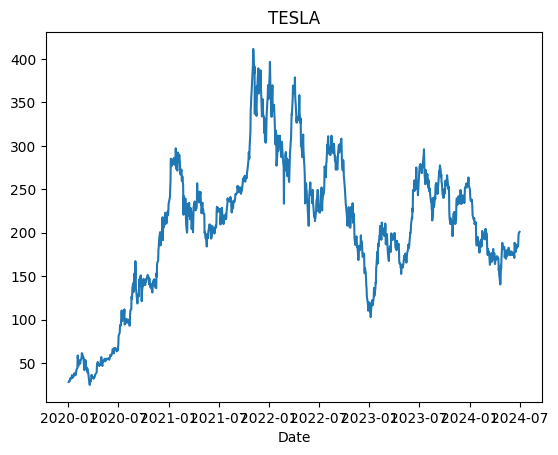

In [50]:
# 그래프 생성
fig, ax = plt.subplots()  # plt.subplot()을 plt.subplots()로 수정
ax.plot(data['Open'])  # TSLA 대신 data 사용
ax.set_title("TESLA")
ax.set_xlabel('Date')
ax.set_xticklabels(TSELA['Open'].index, rotation = 20)
ax.legend(['가격'], loc='best')  # label과 loc 매개변수 수정
plt.show()

### 문제 3 (SeaBorn)

C:\Users\ehdgu\AppData\Local\Temp\ipykernel_19152\1430571292.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])
C:\Users\ehdgu\AppData\Local\Temp\ipykernel_19152\1430571292.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


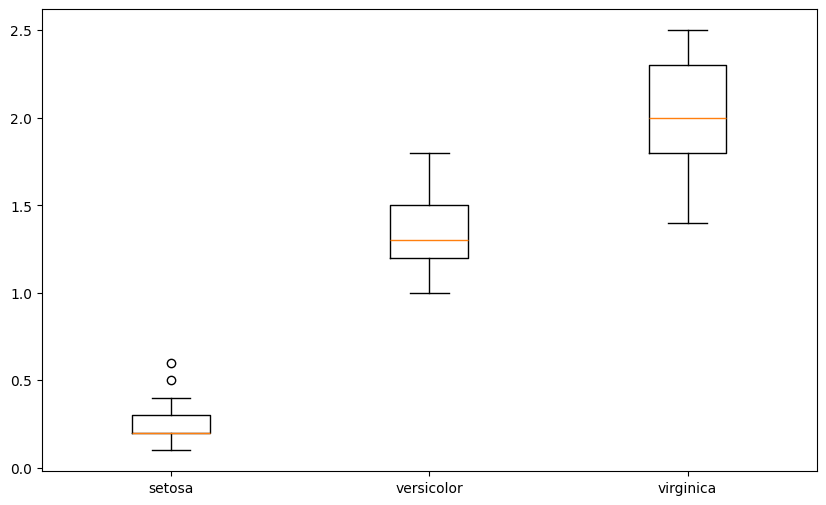

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])

fig.show()

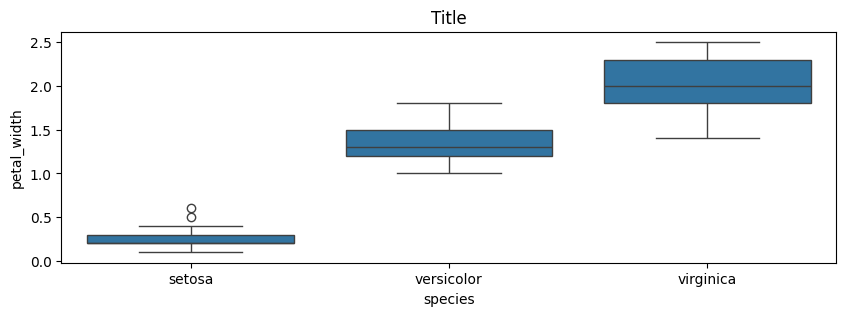

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = sns.load_dataset('iris')

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 3))  # plt.subplot을 plt.subplots로 수정
sns.boxplot(data=iris, x='species', y='petal_width', ax=ax)  # fig를 ax로 변경
ax.set_title('Title')
ax.set_xlabel('species')
plt.show()

### 막대 그래프 만들기

In [74]:
import matplotlib.pyplot as plt # matplotlib 불러오기
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns # seaborn 불러오기
import numpy as np #numpy 불러오기


#### 데이터 불러오기

In [67]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [68]:
#### 기초 데이터

In [77]:
group_mean = tips.groupby(['day'], observed = False)['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending = False).index[0]
# hay = group_mean.index()
h_mean = np.round(group_mean.sort_values(ascending = False).values[0],2)
h_day, h_mean

('Sun', np.float64(21.41))

#### 시각화 객체지행 선언

#### 초 옵션 UDF 함수

In [87]:
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


C:\Users\ehdgu\AppData\Local\Temp\ipykernel_19152\633933426.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)


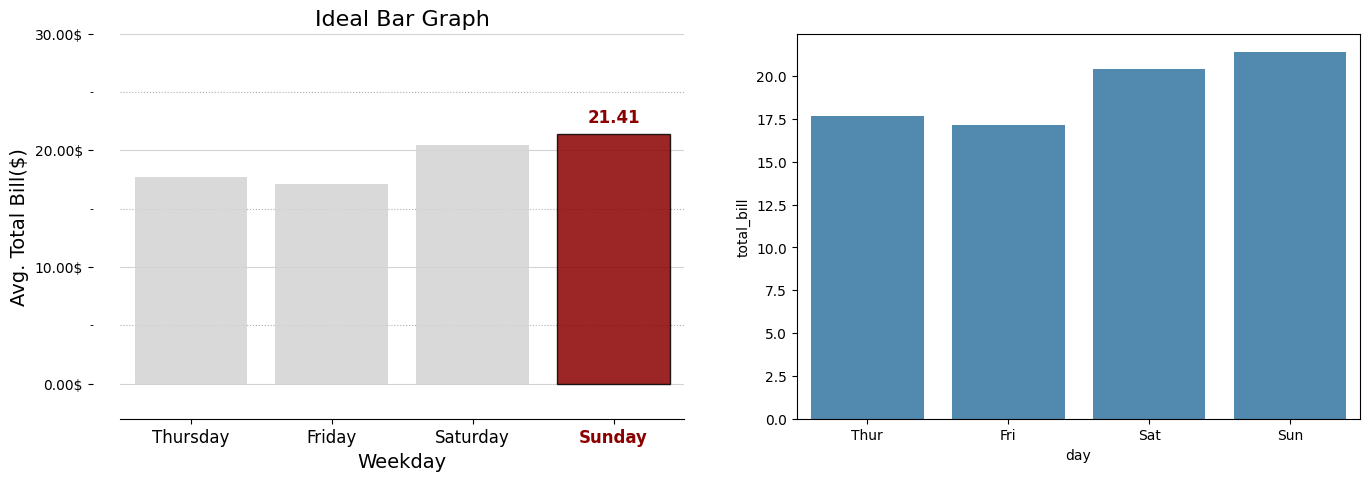

In [89]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
ax0 = sns.barplot(x = 'day', y = 'total_bill', data = tips, 
                  errorbar=None, color = 'lightgray', alpha = 0.85, zorder = 2, 
                  ax = ax[0])

for p in ax0.patches:
    # print(p, type(p))
    fontweight = 'normal'
    color = '#1CE834'
    height = np.round(p.get_height(), 2)
    if h_mean == height:
        # Sun이면 색상을 다르게 주겠다
        fontweight = 'bold'
        color = 'darkred'
        p.set_facecolor(color)
        p.set_edgecolor('black')
#    else:
#        p.set_facecolor(color)
#        p.set_edgecolor('black')

ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

ax1 = sns.barplot(x = 'day', y = 'total_bill', data = tips, 
                  errorbar=None, alpha = 0.85, ax = ax[1])
plt.show()